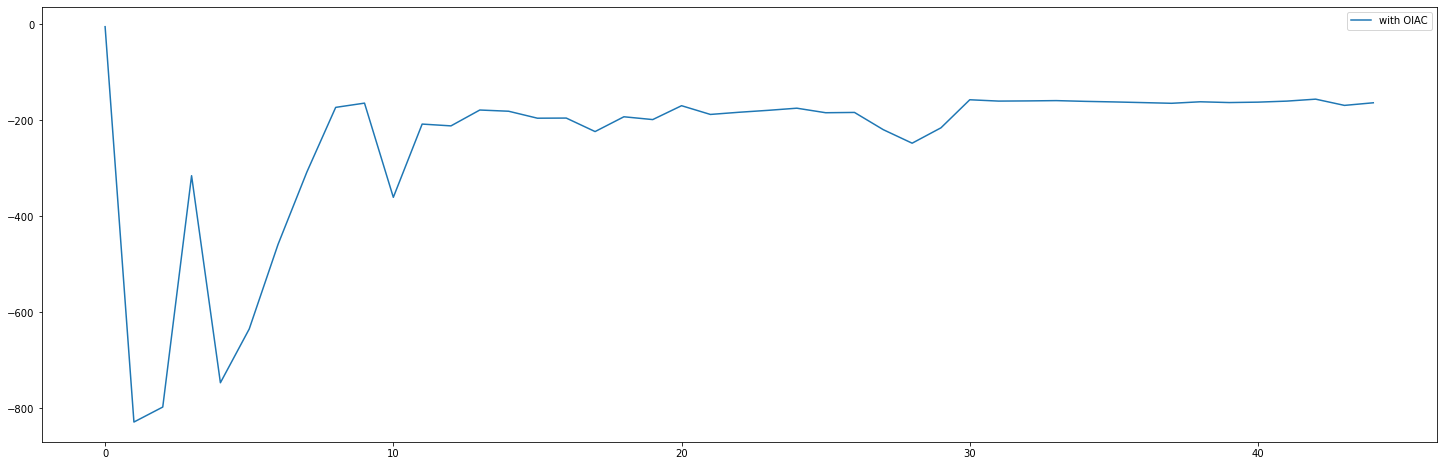

[  -4.76131211 -828.35067533 -797.11967373 -315.18849912 -746.52453043
 -634.52719176 -458.27650225 -307.5674908  -172.85449976 -164.00585489
 -360.23718316 -207.65585417 -211.39277506 -178.35710214 -180.88908959
 -195.41119408 -195.12867831 -223.25194064 -192.42796379 -198.28231038
 -169.37809272 -187.56920828 -183.00261394 -179.02838546 -174.5607491
 -184.01219285 -183.38916278 -219.33367262 -247.47020869 -215.4431512
 -156.98416697 -159.76757416 -159.39244786 -158.75421938 -160.32452964
 -161.48883292 -162.90084216 -164.34243784 -161.19725875 -162.81651393
 -161.95462234 -159.81637357 -155.72672801 -168.71621628 -163.28319176]


In [148]:
import numpy as np
import matplotlib.pyplot as plt
random_data=np.load("results/DDPG_True_10_moving_training_random.npy")
true_load_data=np.load("results/DDPG_True_10_moving_training.npy")
data=np.concatenate((random_data,true_load_data))
fig=plt.figure(figsize=(25,8))
plt.plot(data,label="with OIAC")
plt.legend()
plt.show()
print(data)

/tmp/ipykernel_4086/1742244766.py:75: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  listsac=np.asanyarray(listsac, dtype=float)


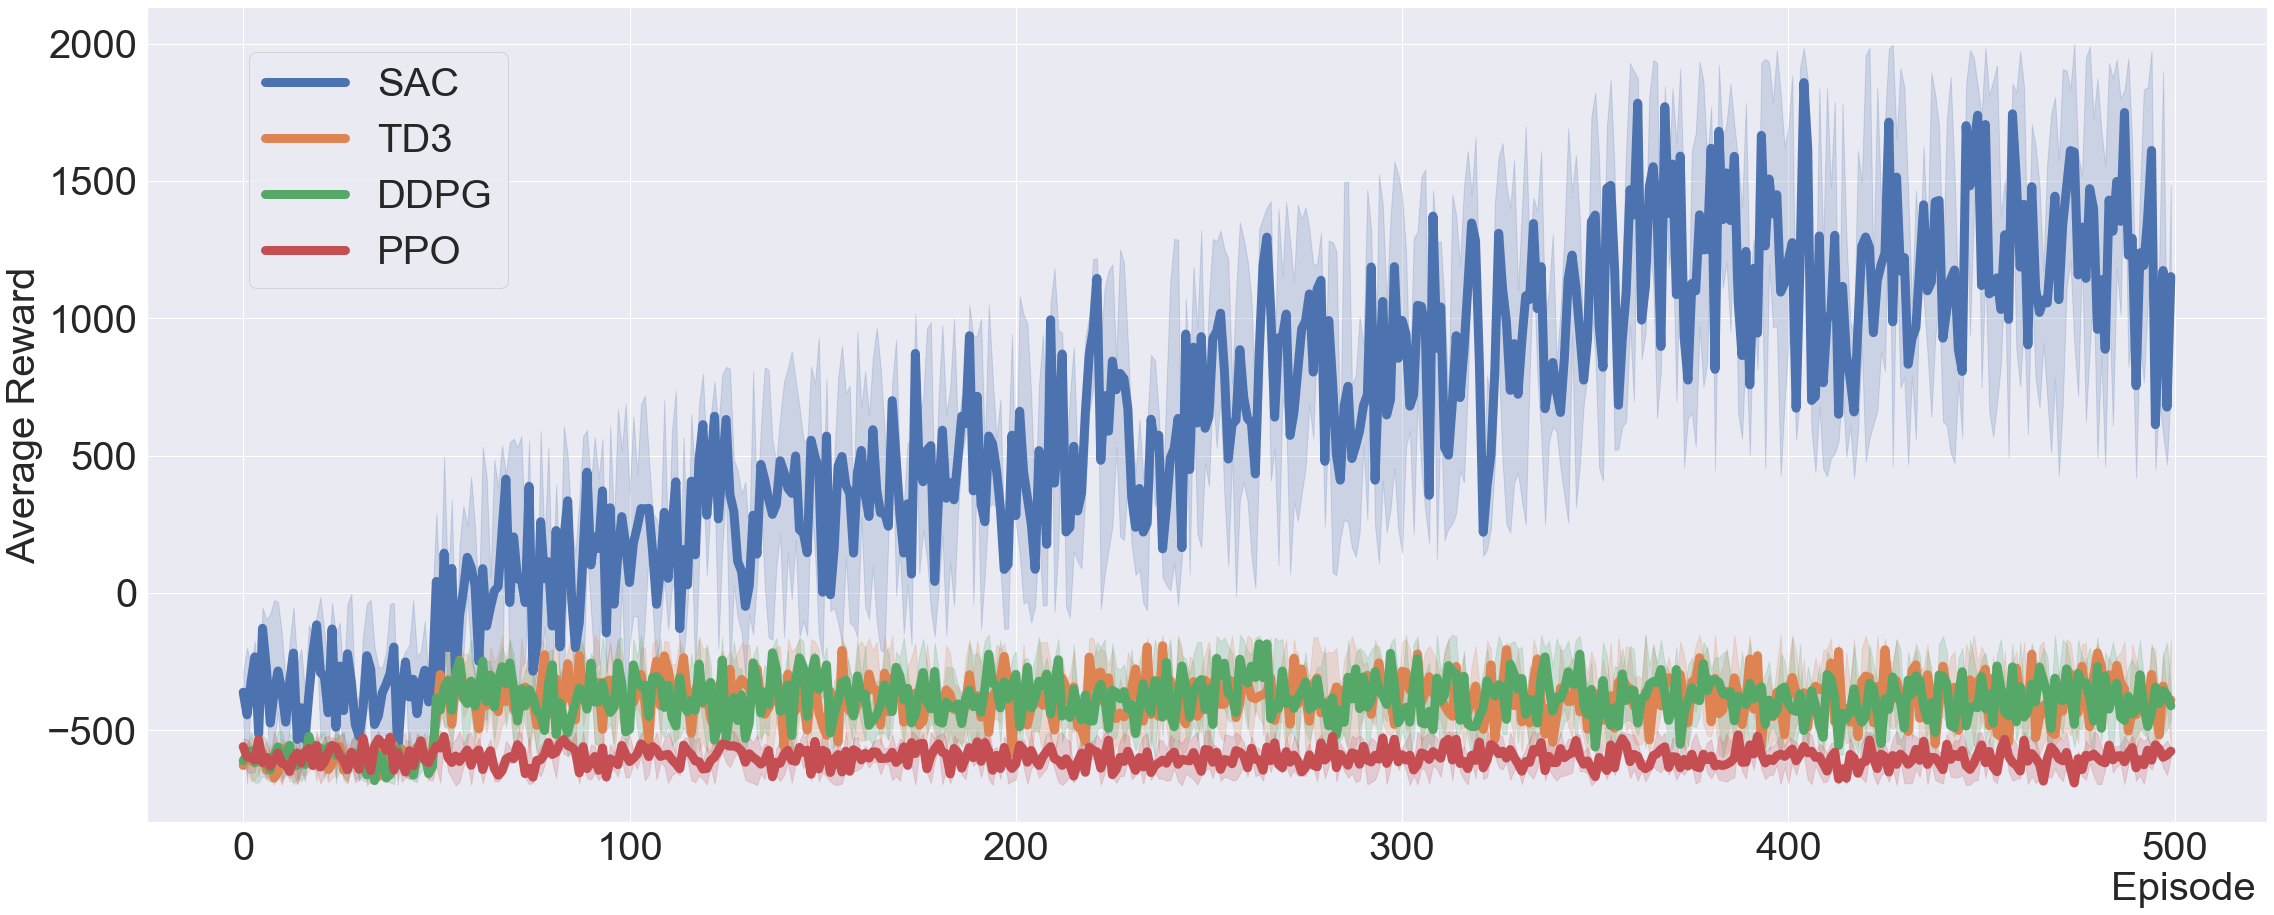

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rc('font',family='Times New Roman')
sns.set()
np.random.seed(0)
listsac=[]
listppo=[]
listtd=[]
listddpg=[]
N=3
#sac
dot_set1=[-700,0]
dot_set2=[400,2000]
value1=50
value2=300
value3=150
hb_l=500
hb_h=1800#1800
lb_l=-500#-500
lb_h=200
interval=value2
hb=np.linspace(hb_l,hb_h,interval)
lb=np.linspace(lb_l,lb_h,interval)
#ppo
hb_ppo=np.linspace(-300,-250,500)
lb_ppo=np.linspace(-700,-500,500)
pposet=[-700,-500]
#ddpg
ddpgset1=[-700,-500]
ddpgset2=[-600,-150]
#td3
td3set1=[-750,-500]
td3set2=[-650,-50]
#sac
for k in range(N):
    data=[]
    for i in range(len(dot_set1)-1):
        for j in range(value1):
            data.append(np.random.uniform(dot_set1[i],dot_set1[i+1]))
    for t in range(value2):
        data.append(np.random.uniform(lb[t],hb[t],1))
    for p in range(len(dot_set2)-1):
        for w in range(value3):
            data.append(np.random.uniform(dot_set2[p],dot_set2[p+1]))
    listsac.append(data)
#ppo
for k in range(N):
    data=[]
    for p in range(len(pposet)-1):
        for w in range(500):
            data.append(np.random.uniform(pposet[p],pposet[p+1]))
    listppo.append(data)
#ddpg
for k in range(N):
    data=[]
    for p in range(len(ddpgset1)-1):
        for w in range(50):
            data.append(np.random.uniform(ddpgset1[p],ddpgset1[p+1]))
    for p in range(len(ddpgset2)-1):
        for w in range(450):
            data.append(np.random.uniform(ddpgset2[p],ddpgset2[p+1]))
    listddpg.append(data)
#td3
for k in range(N):
    data=[]
    for p in range(len(ddpgset1)-1):
        for w in range(50):
            data.append(np.random.uniform(ddpgset1[p],ddpgset1[p+1]))
    for p in range(len(ddpgset2)-1):
        for w in range(450):
            data.append(np.random.uniform(ddpgset2[p],ddpgset2[p+1]))
    listtd.append(data)
listsac=np.asanyarray(listsac, dtype=float)
listppo=np.asanyarray(listppo, dtype=float)
listddpg=np.asanyarray(listddpg, dtype=float)
listtd=np.asanyarray(listtd, dtype=float)
sns_sac=np.vstack((listsac))
sns_ppo=np.vstack((listppo))
sns_td3=np.vstack((listtd))
sns_ddpg=np.vstack((listddpg))
width=38
height=15
line_width=9
font_size=40
df_sac= pd.DataFrame(sns_sac).melt(var_name='episode',value_name='average_reward')
df_ppo= pd.DataFrame(sns_ppo).melt(var_name='episode',value_name='average_reward')
df_td3= pd.DataFrame(sns_td3).melt(var_name='episode',value_name='average_reward')
df_ddpg=pd.DataFrame(sns_ddpg).melt(var_name='episode',value_name='average_reward')
fig,axes=plt.subplots(1,1,figsize=(width,height))
axes.tick_params(axis='x',labelsize=font_size)
axes.tick_params(axis='y',labelsize=font_size)
axes.set_ylabel('Average Reward',fontsize=font_size,loc='center', rotation=90)
axes.set_xlabel('Episode ',fontsize=font_size,loc='right', rotation=0)

sns.lineplot(x="episode", y="average_reward", label='SAC',data=df_sac,linewidth=line_width)
sns.lineplot(x="episode", y="average_reward", label='TD3',data=df_td3,linewidth=line_width)
sns.lineplot(x="episode", y="average_reward", label='DDPG',data=df_ddpg,linewidth=line_width)
sns.lineplot(x="episode", y="average_reward", label='PPO',data=df_ppo,linewidth=line_width)
plt.legend(bbox_to_anchor = (0.18, 0.8), loc='center right',prop={'size':font_size})
#plt.savefig("3D_avg_rewards.png",bbox_inches='tight',dpi=300)
plt.show()


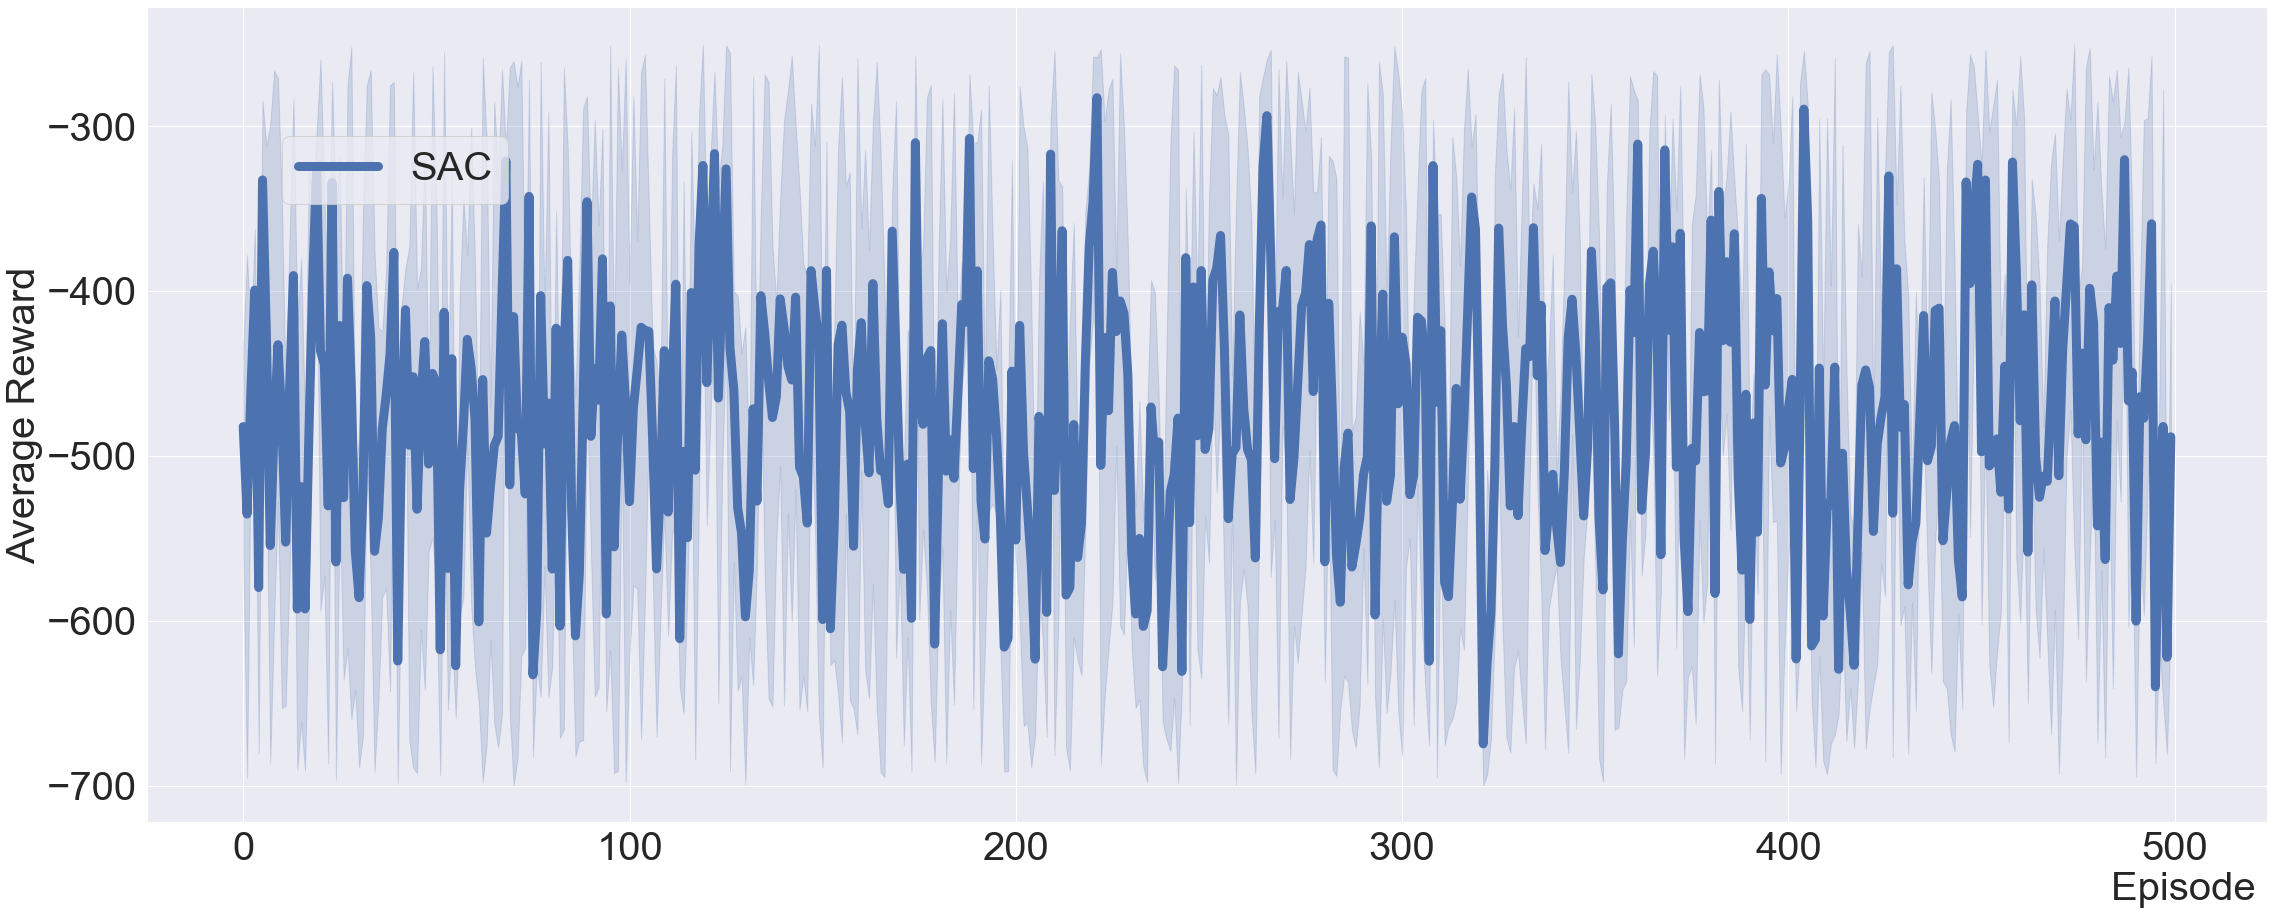

      episode  average_reward
0           0     -453.033923
1           0     -560.328628
2           0     -433.203878
3           1     -378.164785
4           1     -532.134311
...       ...             ...
1495      498     -597.109052
1496      498     -680.936179
1497      499     -472.360127
1498      499     -395.286485
1499      499     -597.516553

[1500 rows x 2 columns]


In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()
np.random.seed(0)
listsac=[]
# random_data1=np.load("tmp_sac/move_sac/EXP[1.414 1.414 0]/SAC_1675945079.843558_True_10_moving_[1.41 1.41 0.  ]_training_random.npy")
# true_load_data1=np.load("tmp_sac/move_sac/EXP[1.414 1.414 0]/SAC_1675945079.843558_True_10_moving_training.npy")
# data1=np.concatenate((random_data1,true_load_data1))[:48]
# random_data2=np.load("tmp_sac/move_sac/EXP[2 0 0]/SAC_1675813776.44178_True_10_moving_[2. 0. 0.]_training_random.npy")
# true_load_data2=np.load("tmp_sac/move_sac/EXP[2 0 0]/SAC_1675813776.44178_True_10_moving_training.npy")
# data2=np.concatenate((random_data2,true_load_data2))

hb_ppo=np.linspace(-300,-250,500)
lb_ppo=np.linspace(-700,-500,500)
dot_set2=[-700,-250]
# for k in range(3):
#     ppo=[]
#     for i in range(500):
#         ppo.append(np.random.uniform(lb_ppo[i],hb_ppo[i],1))
#     listsac.append(ppo)
for k in range(3):
    data=[]
    # for i in range(len(dot_set1)-1):
    #     for j in range(value1):
    #         data.append(np.random.uniform(dot_set1[i],dot_set1[i+1]))
    # for t in range(300):
    #     data.append(np.random.uniform(lb_ppo[t],hb_ppo[t],1))
    for p in range(len(dot_set2)-1):
        for w in range(500):
            data.append(np.random.uniform(dot_set2[p],dot_set2[p+1]))
    listsac.append(data)
# listsac=[data1,data2]
listsac=np.asanyarray(listsac, dtype=float)
sns_sac=np.vstack((listsac))
width=38
height=15
line_width=9
font_size=40
df_sac= pd.DataFrame(sns_sac).melt(var_name='episode',value_name='average_reward')
fig,axes=plt.subplots(1,1,figsize=(width,height))
axes.tick_params(axis='x',labelsize=font_size)
axes.tick_params(axis='y',labelsize=font_size)
axes.set_ylabel('Average Reward',fontsize=font_size,loc='center', rotation=90)
axes.set_xlabel('Episode ',fontsize=font_size,loc='right', rotation=0)

#sns.lineplot(x="episode", y="average_reward", label='CONSTANT', data=df_false,linewidth=line_width)
sns.lineplot(x="episode", y="average_reward", label='SAC',data=df_sac,linewidth=line_width)
plt.legend(bbox_to_anchor = (0.18, 0.8), loc='center right',prop={'size':font_size})
#plt.savefig("../images/avg_rewards.png",bbox_inches='tight',dpi=300)
plt.show()
print(df_sac)

In [147]:
import math

a=0 
b=1.694
c=1.694
math.sqrt(a**2+b**2+c**2)
number=[50,106,89,113,85,110,114,600,338]
import statistics
statistics.mean(number)


178.33333333333334

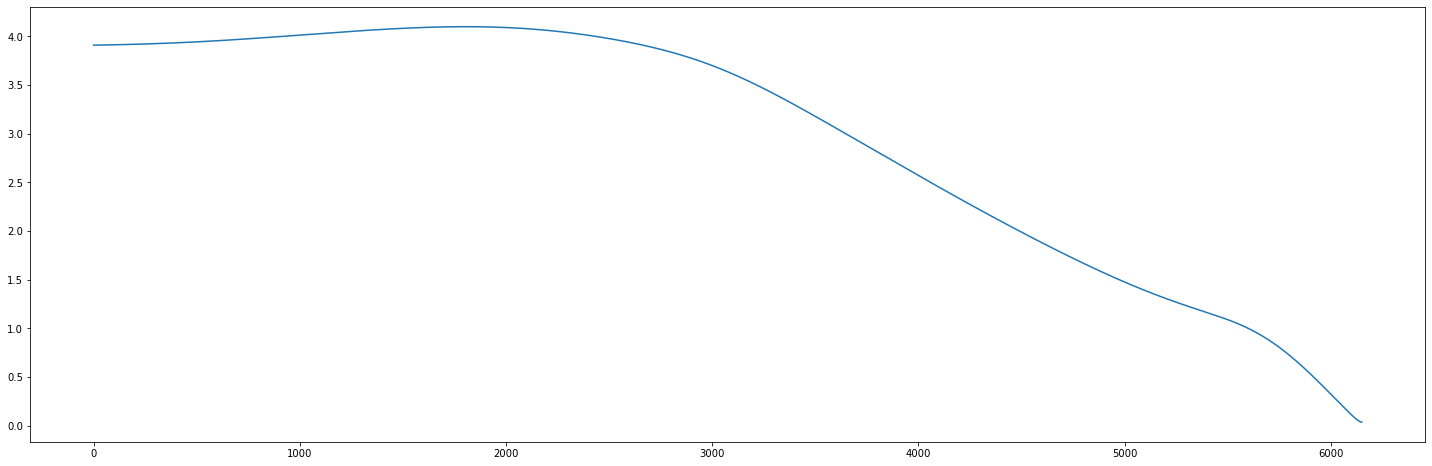

In [105]:
dist=np.load("kbpv/Distance_True.npy")[500:6651]
# dist=np.load("kbpv/Distance_True.npy")
fig=plt.figure(figsize=(25,8))
plt.plot(dist,label="with OIAC")
plt.show()
# print(np.where(dist==dist.min()))
# print(np.where(dist==dist.max()))
# print(min(dist[:]))
# np.savetxt("kbpv/Distance.txt",dist)

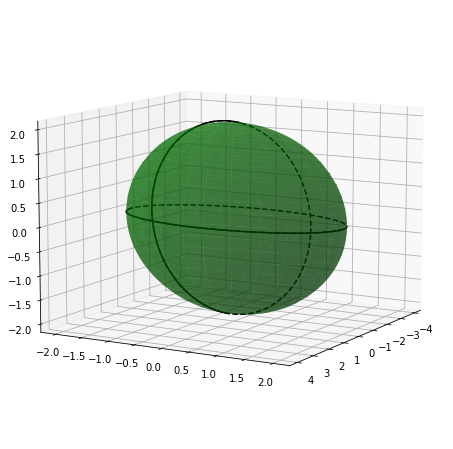

In [11]:
# 3d plot draft
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize=(25,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')

coeff=2
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v))*coeff
y = 1 * np.outer(np.sin(u), np.sin(v))*coeff
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))*coeff
#for i in range(2):
    #ax.plot_surface(x+random.randint(-5,5), y+random.randint(-5,5), z+random.randint(-5,5),  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
elev = 10.0
rot = 80.0 / 180 * np.pi
#if (0<=x<=coeff and 0<=y<=math.sqrt(coeff) and 0<=z<=math.sqrt(coeff)).all():
    # ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='g', linewidth=0, alpha=0.5)
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='g', linewidth=0, alpha=0.5)
    # else:
    #     ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
#calculate vectors for "vertical" circle
a = np.array([-np.sin(elev / 180 * np.pi)*coeff, 0, np.cos(elev / 180 * np.pi)*coeff])
b = np.array([0, 1*coeff, 0])
b = b * np.cos(rot) + np.cross(a, b) * np.sin(rot) + a * np.dot(a, b) * (1 - np.cos(rot))
ax.plot(coeff*np.sin(u),coeff*np.cos(u),0,color='k', linestyle = 'dashed')
horiz_front = np.linspace(0, np.pi, 100)
ax.plot(coeff*np.sin(horiz_front),coeff*np.cos(horiz_front),0,color='k')
vert_front = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), b[1] * np.cos(u), a[2] * np.sin(u) + b[2] * np.cos(u),color='k', linestyle = 'dashed')
ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front), b[1] * np.cos(vert_front), a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front),color='k')

ax.view_init(elev = elev, azim = 30)


plt.show()

In [144]:
import numpy as np
import matplotlib.pyplot as plt

mat_k=np.load('kbpv/tmp_k_True.npy')
mat_k_false=np.load('kbpv/tmp_k_False.npy')
mat_b=np.load('kbpv/tmp_b_True.npy')
mat_b_false=np.load('kbpv/tmp_b_False.npy')
mat_v=np.load('kbpv/tmp_v_True.npy')
mat_v_false=np.load('kbpv/tmp_v_False.npy')
mat_p=np.load('kbpv/tmp_p_True.npy')
mat_p_false=np.load('kbpv/tmp_p_False.npy')
# mat_v_false.shape
true_size=mat_v.shape[0]
false_size=mat_v_false.shape[0]
v1=v2=v3=v4=v1f=v2f=v3f=v4f=p1=p2=p3=p4=p1f=p2f=p3f=p4f=0
ww=[0,0,0,0]#,0,0,0,0]
for i in range(4):
    ww[i]=0
    for j in range (true_size):
        ww[i]+=abs(mat_v[j][i])
    ww.append(ww[i]/true_size)
ww

[array([649.93965527]),
 array([187.71496227]),
 array([118.56952408]),
 array([352.59488694]),
 array([0.07480889]),
 array([0.02160623]),
 array([0.01364751]),
 array([0.04058413])]

In [145]:

for i in range (true_size):
    v1+=abs(mat_v[i][0])
    v2+=abs(mat_v[i][1])
    v3+=abs(mat_v[i][2])
    v4+=abs(mat_v[i][3])
    p1+=abs(mat_p[i][0])
    p2+=abs(mat_p[i][1])
    p3+=abs(mat_p[i][2])
    p4+=abs(mat_p[i][3])
for i in range (false_size):
    v1f+=abs(mat_v_false[i][0])
    v2f+=abs(mat_v_false[i][1])
    v3f+=abs(mat_v_false[i][2])
    v4f+=abs(mat_v_false[i][3])
    p1f+=abs(mat_p_false[i][0])
    p2f+=abs(mat_p_false[i][1])
    p3f+=abs(mat_p_false[i][2])
    p4f+=abs(mat_p_false[i][3])
a_v1=v1/true_size
a_v2=v2/true_size
a_v3=v3/true_size
a_v4=v4/true_size
a_p1=p1/true_size
a_p2=p2/true_size
a_p3=p3/true_size
a_p4=p4/true_size
a_v1f=v1f/false_size
a_v2f=v2f/false_size
a_v3f=v3f/false_size
a_v4f=v4f/false_size
a_p1f=p1f/false_size
a_p2f=p2f/false_size
a_p3f=p3f/false_size
a_p4f=p4f/false_size
ratio_v1=a_v1/a_v1f
ratio_v2=a_v2/a_v2f
ratio_v3=a_v1/a_v3f
ratio_v4=a_v1/a_v4f
ratio_p1=a_p1/a_p1f
ratio_p2=a_p2/a_p2f
ratio_p3=a_p1/a_p3f
ratio_p4=a_p2/a_p4f
print("oiac",a_v1,"const",a_v1f,"ratio:", ratio_v1)
print("oiac",a_v2,"const",a_v2f,"ratio:", ratio_v2)
print("oiac",a_v3,"const",a_v3f,"ratio:", ratio_v3)
print("oiac",a_v4,"const",a_v4f,"ratio:", ratio_v4)
print("oiac",a_p1,"const",a_p1f,"ratio:", ratio_p1)
print("oiac",a_p2,"const",a_p2f,"ratio:", ratio_p2)
print("oiac",a_p3,"const",a_p3f,"ratio:", ratio_p3)
print("oiac",a_p4,"const",a_p4f,"ratio:", ratio_p4)
"""
oiac [0.07480889] const [2.3752495] ratio: [0.03149517]
oiac [0.02160623] const [0.55579124] ratio: [0.03887473]
oiac [0.01364751] const [0.69964334] ratio: [0.10692433]
oiac [0.04058413] const [0.68042327] ratio: [0.10994464]
oiac [0.02366938] const [0.31207334] ratio: [0.07584556]
oiac [0.00753484] const [0.07588107] ratio: [0.09929801]
oiac [0.00765201] const [0.08721505] ratio: [0.27139098]
oiac [0.01639489] const [0.11084185] ratio: [0.06797829]
"""

oiac [0.07480889] const [2.3752495] ratio: [0.03149517]
oiac [0.02160623] const [0.55579124] ratio: [0.03887473]
oiac [0.01364751] const [0.69964334] ratio: [0.10692433]
oiac [0.04058413] const [0.68042327] ratio: [0.10994464]
oiac [0.02366938] const [0.31207334] ratio: [0.07584556]
oiac [0.00753484] const [0.07588107] ratio: [0.09929801]
oiac [0.00765201] const [0.08721505] ratio: [0.27139098]
oiac [0.01639489] const [0.11084185] ratio: [0.06797829]


In [77]:
shape=mat_k.shape[0]
time999=np.linspace(0.0,1.0,num=shape)
mat_v_false=mat_v_false[:shape]
mat_p_false=mat_p_false[:shape]
k_ss1=mat_k[:,:,0][:,0]
k_ss2=mat_k[:,:,1][:,1]
k_ss3=mat_k[:,:,2][:,2]
k_ee=mat_k[:,:,3][:,3]

b_ss1=mat_b[:,:,0][:,0]
b_ss2=mat_b[:,:,1][:,1]
b_ss3=mat_b[:,:,2][:,2]
b_ee=mat_b[:,:,3][:,3]
# time999.shape
# np.savetxt("kbpv/k_ss1.txt",k_ss1)
# np.savetxt("kbpv/k_ss2.txt",k_ss2)
# np.savetxt("kbpv/k_ss3.txt",k_ss3)
# np.savetxt("kbpv/k_ee.txt",k_ee)
# np.savetxt("kbpv/b_ss1.txt", b_ss1)
# np.savetxt("kbpv/b_ss2.txt", b_ss2)
# np.savetxt("kbpv/b_ss3.txt", b_ss3)
# np.savetxt("kbpv/b_ee.txt", b_ee)
# np.savetxt("time999.txt",time999)

In [82]:
v_ss1=mat_v[:,:,0][:,0]
v_ss2=mat_v[:,:,0][:,1]
v_ss3=mat_v[:,:,0][:,2]
v_ee=mat_v[:,:,0][:,3]

v_ss1_f=mat_v_false[:,:,0][:,0]
v_ss2_f=mat_v_false[:,:,0][:,1]
v_ss3_f=mat_v_false[:,:,0][:,2]
v_ee_f=mat_v_false[:,:,0][:,3]

p_ss1=mat_p[:,:,0][:,0]
p_ss2=mat_p[:,:,0][:,1]
p_ss3=mat_p[:,:,0][:,2]
p_ee=mat_p[:,:,0][:,3]

p_ss1_f=mat_p_false[:,:,0][:,0]
p_ss2_f=mat_p_false[:,:,0][:,1]
p_ss3_f=mat_p_false[:,:,0][:,2]
p_ee_f=mat_p_false[:,:,0][:,3]
# np.savetxt("kbpv/v_ss1.txt",v_ss1)
# np.savetxt("kbpv/v_ss2.txt",v_ss2)
# np.savetxt("kbpv/v_ss3.txt",v_ss3)
# np.savetxt("kbpv/v_ee.txt",v_ee)
# np.savetxt("kbpv/v_ss1_f.txt",v_ss1_f)
# np.savetxt("kbpv/v_ss2_f.txt",v_ss2_f)
# np.savetxt("kbpv/v_ss3_f.txt",v_ss3_f)
# np.savetxt("kbpv/v_ee_f.txt",v_ee_f)
# np.savetxt("time999.txt",time999)
# np.savetxt("kbpv/p_ss1.txt",p_ss1)
# np.savetxt("kbpv/p_ss1_f.txt",p_ss1_f)
# np.savetxt("kbpv/p_ss2.txt",p_ss2)
# np.savetxt("kbpv/p_ss2_f.txt",p_ss2_f)
# np.savetxt("kbpv/p_ss3.txt",p_ss3)
# np.savetxt("kbpv/p_ss3_f.txt",p_ss3_f)
# np.savetxt("kbpv/p_ee.txt",p_ee)
# np.savetxt("kbpv/p_ee_f.txt",p_ee_f)
max(p_ss2)
min(p_ss2)

-0.01558237998383992

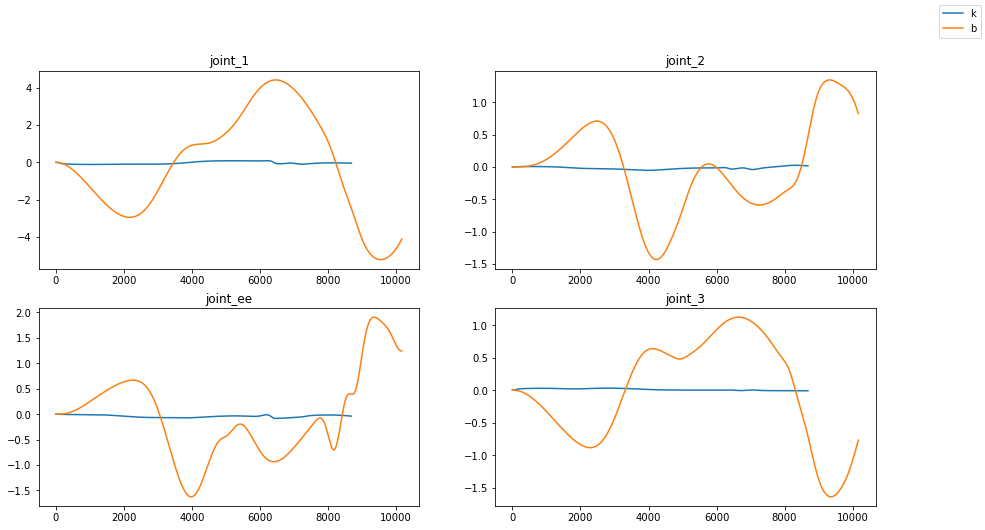

0.026365972559435034


In [83]:

width=15
height=8
fig,axes= plt.subplots(2,2, figsize=(width,height))  
axes[0,0].plot(v_ss1)
axes[0,0].plot(v_ss1_f)
axes[0,0].set_title("joint_1")


axes[0,1].plot(v_ss2)
axes[0,1].plot(v_ss2_f)
axes[0,1].set_title("joint_2")

axes[1,1].plot(v_ss3)
axes[1,1].plot(v_ss3_f)
axes[1,1].set_title("joint_3")

axes[1,0].plot(v_ee,label="k")
axes[1,0].plot(v_ee_f,label="b")
axes[1,0].set_title("joint_ee")
fig.legend()
plt.show()
print(max(v_ss2))